In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

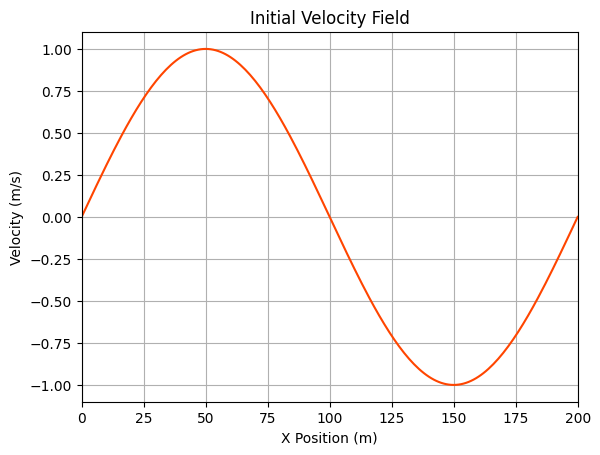

In [2]:
x = []
y = []

plots = 200

for i in range(plots + 1):
    x.append(i)
    y.append(np.sin(x[-1]/plots * 2 * np.pi))

plt.plot(x, y, color = 'orangered')
plt.title('Initial Velocity Field')
plt.ylabel('Velocity (m/s)')
plt.xlabel('X Position (m)')
plt.xlim(x[0], x[-1])
plt.grid()
plt.show()

In [3]:
y_avgs = []

for i in range(plots + 1):
    y_avgs.append(y[i])

boxes = 40
box_size = len(x)/boxes
temp = 0

for i in range(boxes):
    temp = 0
    
    for j in range(int(box_size)):
        temp += y_avgs[int(i*box_size + j)]
    temp /= box_size
    
    for j in range(int(box_size)):
        y_avgs[int(i*box_size + j)] = temp

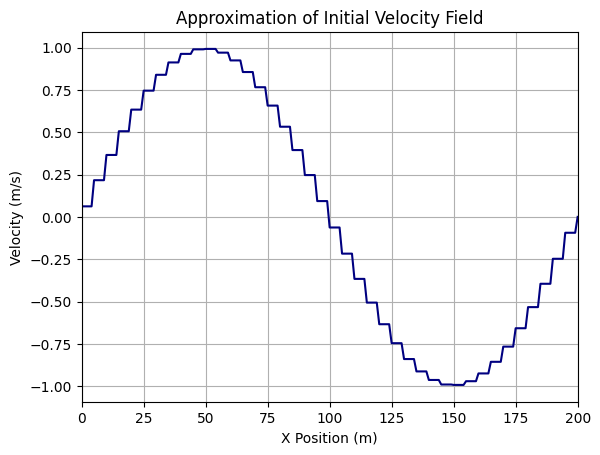

In [4]:
plt.plot(x, y_avgs, color = 'navy') #, label = 'Approximation'
#  plt.plot(x, y, color = 'orangered', label = 'True Initial Value')
plt.title('Approximation of Initial Velocity Field')
plt.ylabel('Velocity (m/s)')
plt.xlabel('X Position (m)')
plt.xlim(x[0], x[-1])
# plt.legend(frameon=False)
plt.grid()
plt.show()

In [5]:
def flux_function(uL, uR):
    return 0.5*(uL + uR)

In [10]:
def godunov(wL, wR):
    # Burger's equation
    fL = wL**2 / 2
    fR = wR**2 / 2
    
    f = max(fL, fR)
    
    if (wL < wR):
        f = min(fL, fR)
    
    if (wL < 0 and wR > 0):
        f = 0
        
    return f

In [11]:
def flux_approx_method(steps):
    dt = 0.1 #s, arbitrarily chosen for now
    timesteps = steps
    left_constant = 0
    right_constant = 0

    y_new = []

    for i in range(plots + 1):
        y_new.append(y_avgs[i])

    for k in range(timesteps):
        for i in range(boxes):
            value = y_new[int(i*box_size)]

            # u_{t+1} = u_{t} + l_flux*dt - r_flux*dt

            if (i == 0):
                # l_flux = flux_function(left_constant, value)
                l_flux = godunov(left_constant, value)
            else:
                # l_flux = flux_function(y_new[int(i*box_size) - 1], value)
                l_flux = godunov(y_new[int((i-1)*box_size)], value)

            if (i >= boxes - 1):
                # r_flux = flux_function(value, right_constant)
                r_flux = godunov(value, right_constant) 
            else:
                # r_flux = flux_function(value, y_new[int(i*box_size) + 1])
                r_flux = godunov(value, y_new[int((i+1)*box_size)])

            new_val = value + l_flux * dt - r_flux * dt

            for j in range(int(box_size)):
                y_new[int(i*box_size + j)] = new_val
    
    return y_new

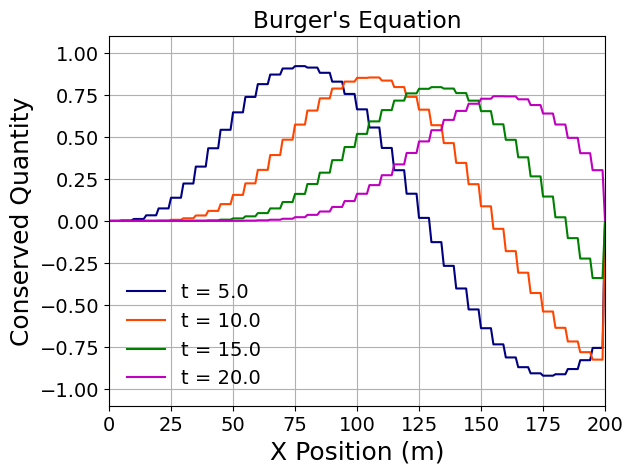

In [12]:
steps = 0
figures = 4

for i in range(figures):
    plt.rcParams.update({'font.size': 14})
    steps += 50
    
    arr = flux_approx_method(steps)
    
    if i % 5 == 0:
        plt.plot(x, arr, color = 'navy', label = f't = {steps * 0.1}')
    elif i % 5 == 1:
        plt.plot(x, arr, color = 'orangered', label = f't = {steps * 0.1}')
    elif i % 5 == 2:
        plt.plot(x, arr, color = 'green', label = f't = {steps * 0.1}')
    elif i % 5 == 3:
        plt.plot(x, arr, color = 'm', label = f't = {steps * 0.1}')
    else:
        plt.plot(x, arr, color = 'y', label = f't = {steps * 0.1}')

plt.title('Burger\'s Equation')
plt.ylabel('Conserved Quantity', fontsize = 18)
plt.xlabel('X Position (m)', fontsize = 18)
plt.xlim(x[0], x[-1])
plt.ylim(-1.1, 1.1)
plt.legend(frameon=False)
plt.grid()
plt.show()

# Animation

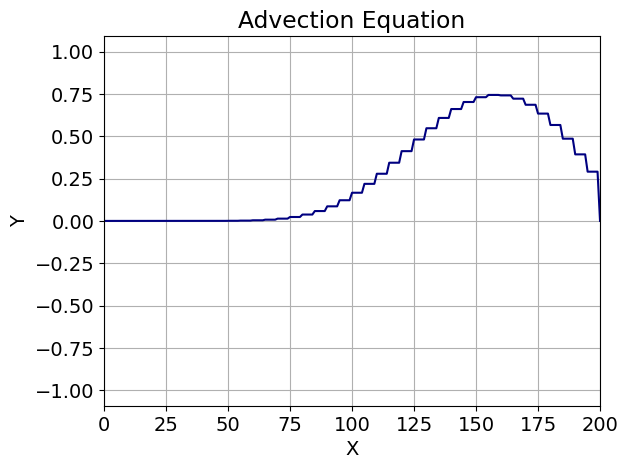

In [14]:
fig, ax = plt.subplots()

u, = ax.plot(x, flux_approx_method(0), color = 'navy', label = 'Approximation')

def animate(i):
    u.set_ydata(flux_approx_method(i))  # update the data.
    return u,

ani = animation.FuncAnimation(fig, animate, interval=100, blit=True, save_count=200)

# plt.plot(x, y, color = 'orangered', label = 'True Initial Value')
plt.title('Burger\'s Equation')
plt.ylabel('Y')
plt.xlabel('X')
plt.xlim(x[0], x[-1])
# plt.legend(frameon=False, loc=3)
plt.grid()

# To save the animation, use
writergif = animation.PillowWriter(fps=30)
ani.save('sine_wave_burgers.gif',writer=writergif)

plt.show()